In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#for selecting the best feature effecting the target variable
from sklearn.feature_selection import SelectKBest,chi2
# for splitting the data into train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
# regression metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [3]:
df=pd.read_csv("listings.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [5]:
df.shape

(7907, 16)

Sorting the table by price

In [6]:
df = df.sort_values(by=["price"], ascending=False)
df['rank']=tuple(zip(df.price))
df['rank']=df.groupby('price',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rank
2978,20791161,YOUR entire PRIVATE LUXURY PENTHOUSE condo unit,122991242,Jj,West Region,Tuas,1.31909,103.64656,Entire home/apt,10000,2,5,2017-10-31,0.21,1,89,0
2392,17831833,Comfortable & Quiet Master Bedroom,68223771,Yolivia,West Region,Bukit Panjang,1.34775,103.77181,Private room,10000,1,1,2017-05-27,0.04,1,0,0
5823,32026675,Testing,20307016,David,Central Region,Kallang,1.29610,103.86613,Private room,10000,1,0,NaN,NaN,1,0,0
2100,16395877,The Club Residences - Contemporary Manor,84411185,Darren,Central Region,Southern Islands,1.25284,103.82225,Entire home/apt,8900,2,0,NaN,NaN,6,361,0
3485,22617828,The Club Residences - Contemporary Manor (A),84411185,Darren,Central Region,Southern Islands,1.25054,103.82551,Entire home/apt,8900,2,0,NaN,NaN,6,0,0


dropping the unnecessary items

In [9]:
df.drop(['id','name','host_name','host_id','last_review'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
rank                                 0
dtype: int64

In [11]:
def impute_median(series):
    return series.fillna(series.median())

In [12]:
df.reviews_per_month=df["reviews_per_month"].transform(impute_median)

<ipython-input-13-79d59cfc256a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'rank'}>]], dtype=object)

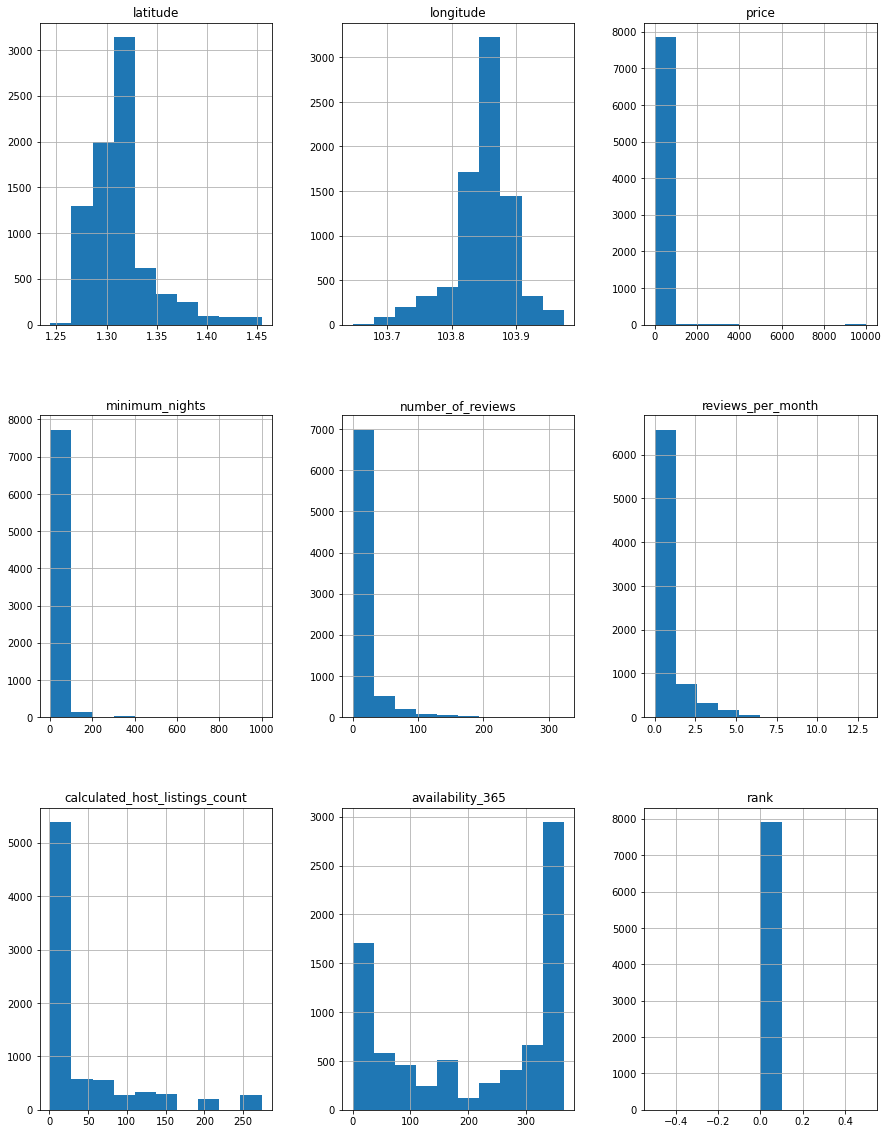

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<AxesSubplot:>

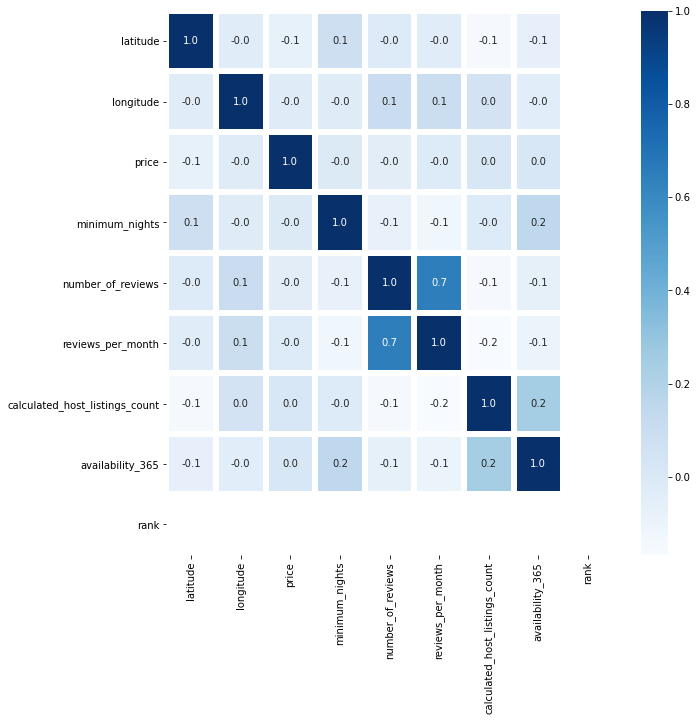

In [56]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax,cmap='Blues')
#plt.show()

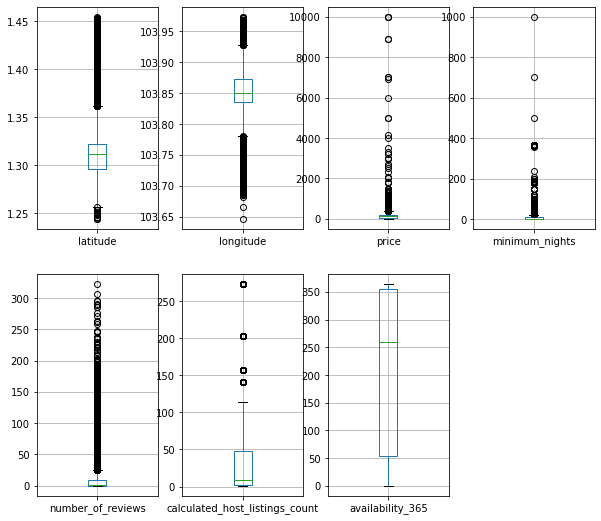

In [57]:
names=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
plt.figure(figsize=(10,9))
for i in range(1,8):
    
    plt.subplot(2,4,i)
    fig=df.boxplot(column=names[i-1])

Checking the distribution of each numerical feature to decide the method of detecting outliers for each of them

D:\UbuntuMachines\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\UbuntuMachines\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\UbuntuMachines\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histo

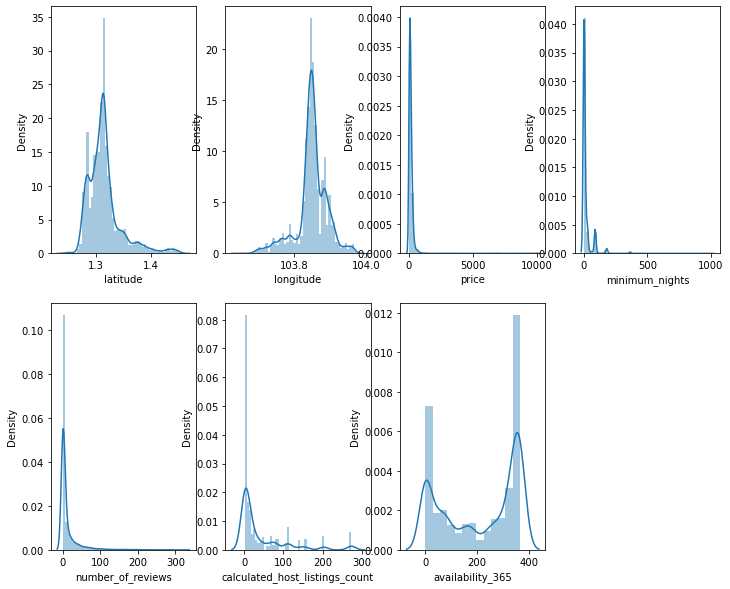

In [58]:
plt.figure(figsize=(12,10))
for j in range(1,8):
    plt.subplot(2,4,j)
    sns.distplot(df[names[j-1]])

In [59]:
#for latitude
std=np.std(df['latitude'])
mean=np.mean(df['latitude'])
median=np.median(df['latitude'])
outliers=[]
for x in df['latitude']:
    zscore=(x-mean)/std
    if zscore>abs(3):
        outliers.append(x)

In [60]:
len(outliers)

176

Removing the outliers by imputing them with median value

In [61]:
df_new=df.replace(outliers,median)

D:\UbuntuMachines\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\UbuntuMachines\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'after removing outliers')

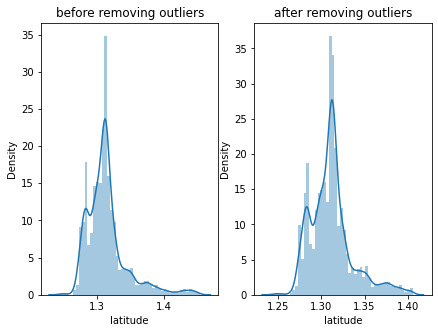

In [62]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
fig=sns.distplot(df['latitude'])
plt.title('before removing outliers')
plt.subplot(1,2,2)
fig2=sns.distplot(df_new['latitude'])
plt.title('after removing outliers')

In [22]:
#for longitude
std=np.std(df['longitude'])
mean=np.mean(df['longitude'])
median=np.median(df['longitude'])
outliers=[]
for x in df['longitude']:
    zscore=(x-mean)/std
    if -3<zscore>3:
        outliers.append(x)

In [23]:
len(outliers)

0

In [24]:
#for minimum_nights
q1=df['minimum_nights'].quantile(0.25)
q3=df['minimum_nights'].quantile(0.75)
outlier=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in df['minimum_nights']:
    if i<lower_bound or i>upper_bound:
            outlier.append(i) 

In [25]:
len(outlier)

1407

D:\UbuntuMachines\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

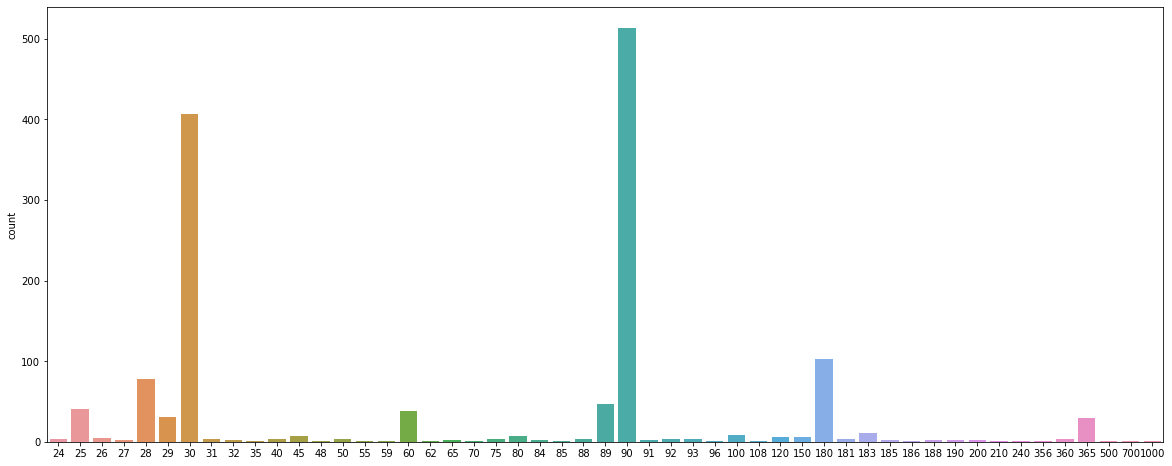

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(outlier)

In [27]:
df_new=df[df['minimum_nights']<=365]

D:\UbuntuMachines\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\UbuntuMachines\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'after removing outliers')

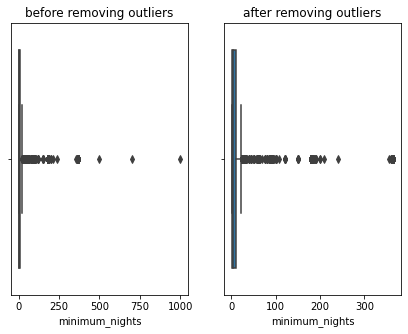

In [28]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
sns.boxplot(df['minimum_nights'])
plt.title('before removing outliers')
plt.subplot(1,2,2)
sns.boxplot(df_new['minimum_nights'])
plt.title('after removing outliers')

In [29]:
#for calculated_host_listings_count
q1=df['calculated_host_listings_count'].quantile(0.25)
q3=df['calculated_host_listings_count'].quantile(0.75)
outlier=[]
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
for i in df['calculated_host_listings_count']:
    if i<lower_bound or i>upper_bound:
            outlier.append(i) 

In [30]:
len(outlier)

775

D:\UbuntuMachines\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

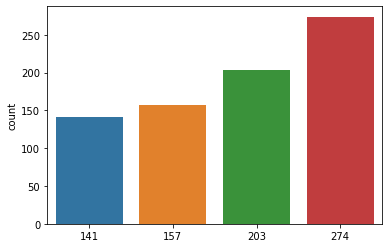

In [31]:
sns.countplot(outlier)

These values of detected as outliers according to upper and lower bound rule are not outliers as values like '274','203','157' and '141' can be a count of host listings on air-bnb. So these values are left untouched.

In [32]:
df_new['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [33]:
mappings={'Entire home/apt':1,'Private room':2,'Shared room':3}
df_new['room_type']=df_new['room_type'].map(mappings)

<ipython-input-33-255dad7e414d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['room_type']=df_new['room_type'].map(mappings)


In [34]:
df_new['neighbourhood'].unique()

array(['Tuas', 'Bukit Panjang', 'Kallang', 'Southern Islands', 'Outram',
       'Jurong East', 'Bukit Batok', 'Bedok', 'Rochor', 'Toa Payoh',
       'Bukit Timah', 'Tanglin', 'Hougang', 'Bukit Merah', 'Novena',
       'Singapore River', 'Downtown Core', 'Bishan', 'Geylang',
       'Choa Chu Kang', 'Clementi', 'Orchard', 'Newton', 'River Valley',
       'Jurong West', 'Sengkang', 'Museum', 'Queenstown', 'Yishun',
       'Marine Parade', 'Tampines', 'Central Water Catchment',
       'Pasir Ris', 'Ang Mo Kio', 'Sembawang', 'Marina South',
       'Woodlands', 'Punggol', 'Serangoon', 'Sungei Kadut', 'Mandai',
       'Lim Chu Kang', 'Western Water Catchment'], dtype=object)

As there are total 43 levels in 'neighbourhood' feature we can go for Binary Encoder so as to prevent dimensionality reduction by using one hot encoding

In [35]:
import category_encoders as ce
binary=ce.BinaryEncoder(cols=['neighbourhood'])
df_new=binary.fit_transform(df_new)

D:\UbuntuMachines\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [36]:
df_new.head()

,neighbourhood_group,neighbourhood_0,neighbourhood_1,neighbourhood_2,neighbourhood_3,neighbourhood_4,neighbourhood_5,neighbourhood_6,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,rank
2978,West Region,0,0,0,0,0,0,1,1.31909,103.64656,1,10000,2,5,0.21,1,89,0
2392,West Region,0,0,0,0,0,1,0,1.34775,103.77181,2,10000,1,1,0.04,1,0,0
5823,Central Region,0,0,0,0,0,1,1,1.29610,103.86613,2,10000,1,0,0.55,1,0,0
2100,Central Region,0,0,0,0,1,0,0,1.25284,103.82225,1,8900,2,0,0.55,6,361,0
3485,Central Region,0,0,0,0,1,0,0,1.25054,103.82551,1,8900,2,0,0.55,6,0,0


In [37]:
x=df_new.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15]].values
y=df_new.iloc[:,12:13].values

In [38]:
df['neighbourhood_group'].unique()

array(['West Region', 'Central Region', 'East Region',
       'North-East Region', 'North Region'], dtype=object)

As there are 5 levels and the values are nominal type we can perform label encoding

In [39]:

label=LabelEncoder()
x[:,0]=label.fit_transform(x[:,0])

After converting all the features into numeric form we can check which indenpendent features are best effecting the target feature i.e. 'price'

In [40]:
best_features=SelectKBest(score_func=chi2,k=5)
fit=best_features.fit(x,y)

In [41]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(['neighbourhood_group', 'neighbourhood_0', 'neighbourhood_1',
       'neighbourhood_2', 'neighbourhood_3', 'neighbourhood_4',
       'neighbourhood_5', 'neighbourhood_6', 'latitude', 'longitude',
       'room_type','minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'])
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
result=featureScores.nlargest(5,'Score')
print(result)

                             Specs          Score
14                availability_365  237092.818317
11                  minimum_nights   94002.004135
12               number_of_reviews   28533.337013
13  calculated_host_listings_count     991.555578
0              neighbourhood_group     754.383667


<AxesSubplot:xlabel='Specs', ylabel='Score'>

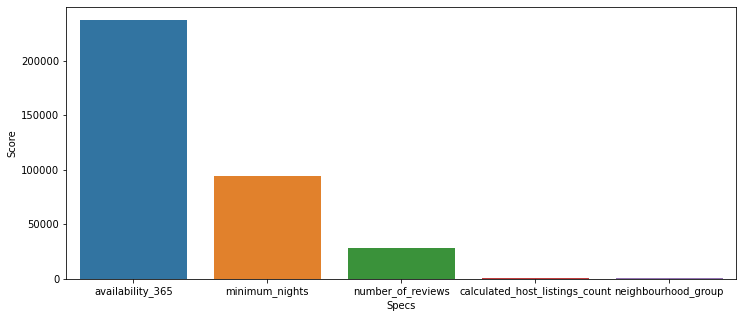

In [42]:
plt.figure(figsize=(12,5))
sns.barplot(x=result['Specs'],y=result['Score'])

Here we can see that 'calculated_host_listings_count' and 'minimum_nights' are the features that mostly affect our target variable (feature) i.e. 'price'

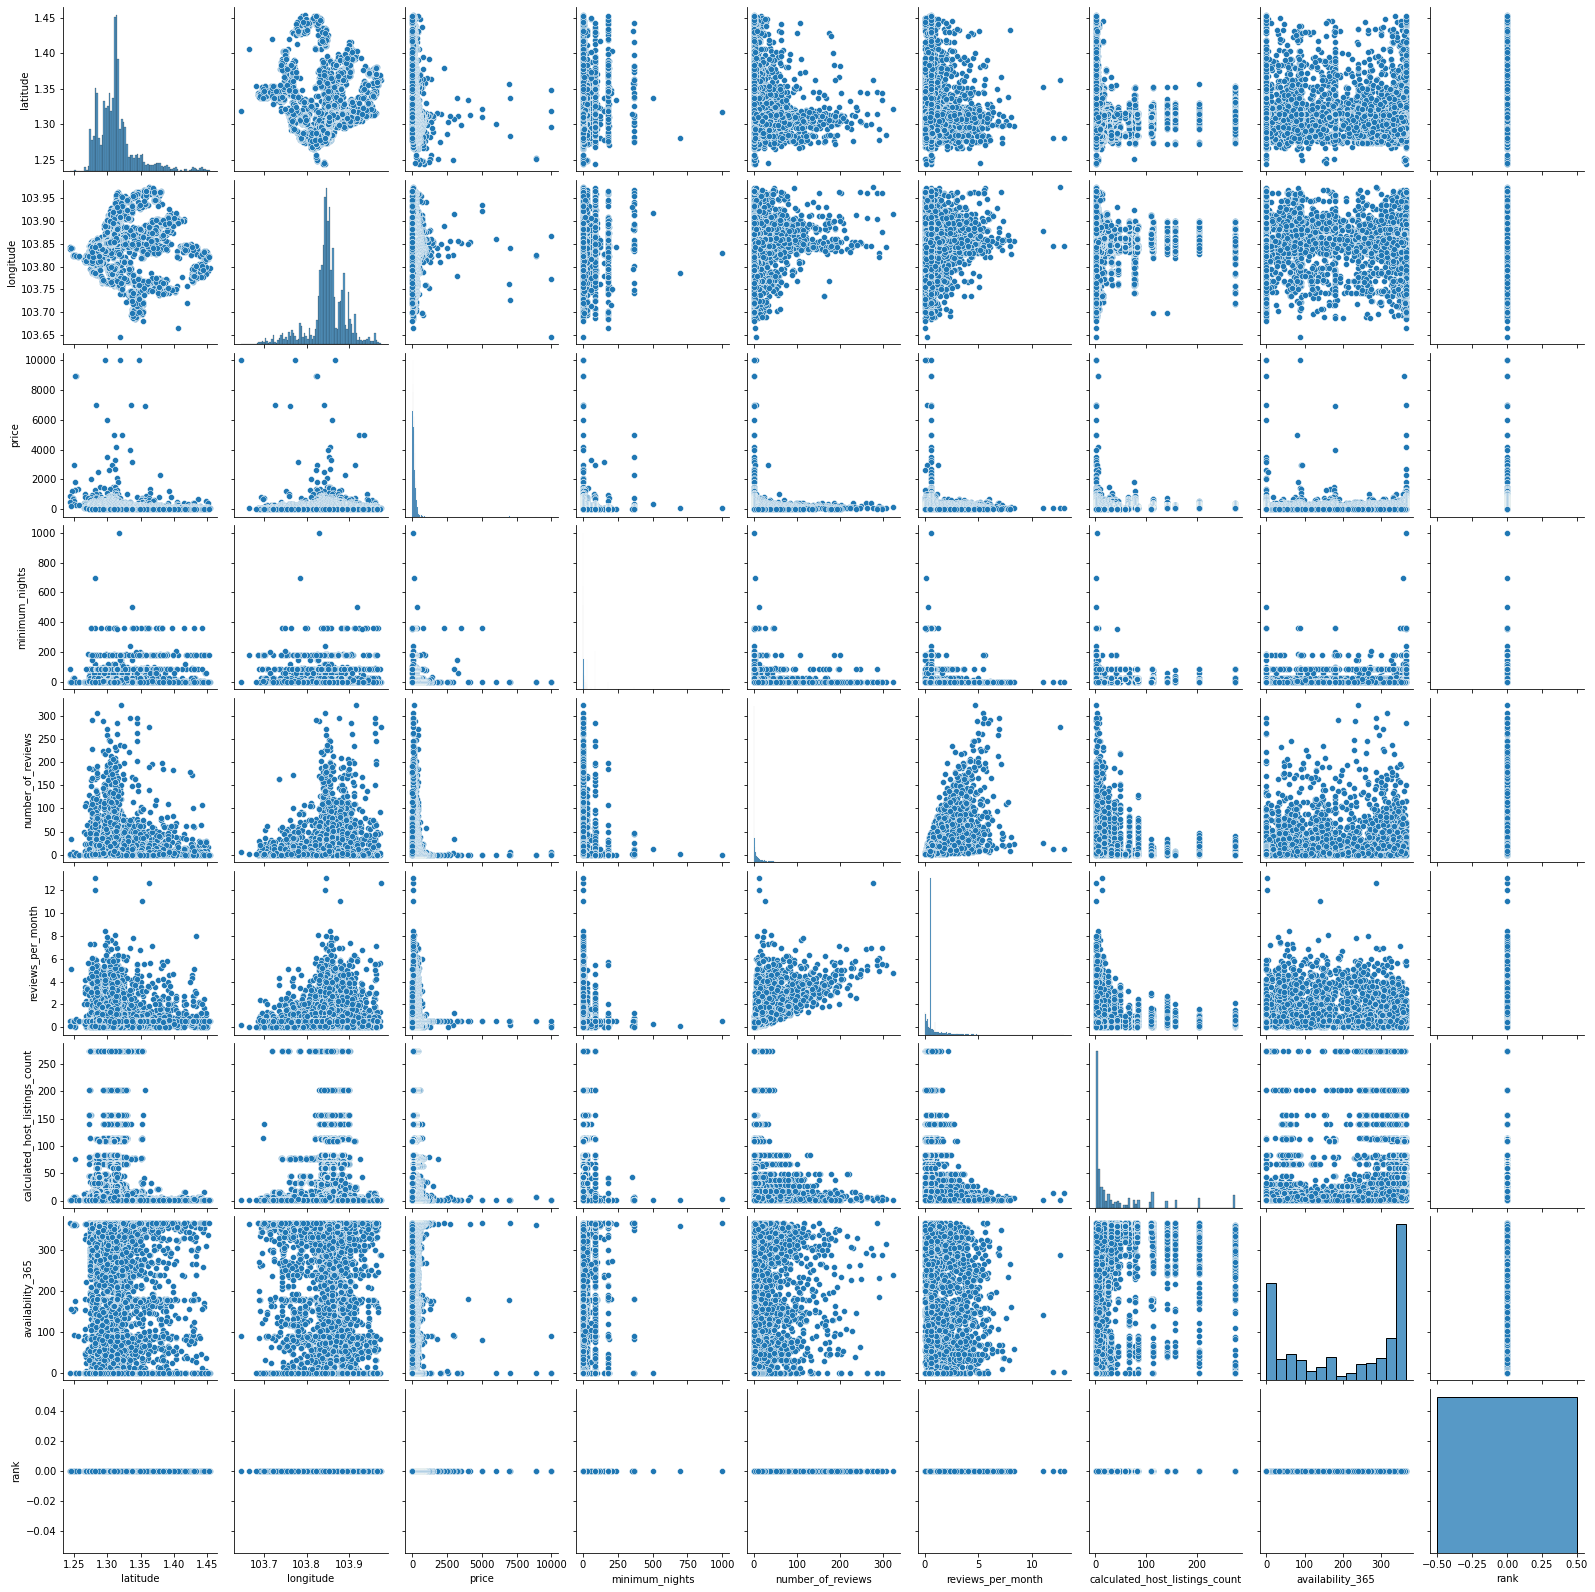

In [44]:
sns.pairplot(df)

As the features are not having linear relationship with each other we cant use linear regression model.Instead we can go for SVR.

In [46]:
# scaling the features is necessary to implement svr 
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
regressor=SVR(kernel='rbf')
regressor.fit(x_train,y_train)
predictions=regressor.predict(x_test)

D:\UbuntuMachines\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [49]:
predict=pd.DataFrame(predictions)
ytest=pd.DataFrame(y_test)
resultant=pd.concat([predict,ytest],axis=1)

In [50]:
resultant.columns=['Predicted_values','Actual_values']

In [51]:
resultant.head()

,Predicted_values,Actual_values
0,-0.250070,0.297613
1,-0.323667,-0.360284
2,-0.247136,4.320905
3,-0.111882,-0.056639
4,-0.281875,1.815837


In [52]:
mae=mean_absolute_error(y_test,predictions)
rmse=sqrt(mean_squared_error(y_test,predictions))

In [53]:
mae

0.40901495454208364

Usually mae ranges from 0 to infinity and lower the value better are the predictions.
So a value of 0.33 indicates that the model can give good predictions

In [54]:
rmse

1.1239809084936006

RMSE is always much higher than the mean absolute error(mae) as they are the squared values of error.